In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import YearLocator, DateFormatter
import geopandas as gpd
import seaborn as sns
import folium
import numpy as np

In [12]:
df= pd.read_csv('train.csv', delimiter=',')

In [ ]:
df.info()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [ ]:
encoding = ['steering_type', 'transmission_type', 'rear_brakes_type', 
                     'engine_type', 'fuel_type', 'model', 'segment', 'area_cluster', 'max_torque', 'max_power']


for column in encoding:
    df = pd.get_dummies(df, columns=[column], prefix=column)

In [14]:
encoding_col= ['is_parking_sensors', 'is_adjustable_steering', 
               'is_esc', 'is_tpms', 'is_parking_camera','is_front_fog_lights', 
               'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 
               'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 
               'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw',
               'is_speed_alert'] 

for column in encoding_col:
    df[column] = df[column].map({'Yes': 1, 'No': 0})


In [15]:
numerical_columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density',
                     'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius',
                     'length', 'width', 'height', 'gross_weight', 'ncap_rating']

for column in numerical_columns:
    if column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

numerical_df = df.select_dtypes(include=['number'])

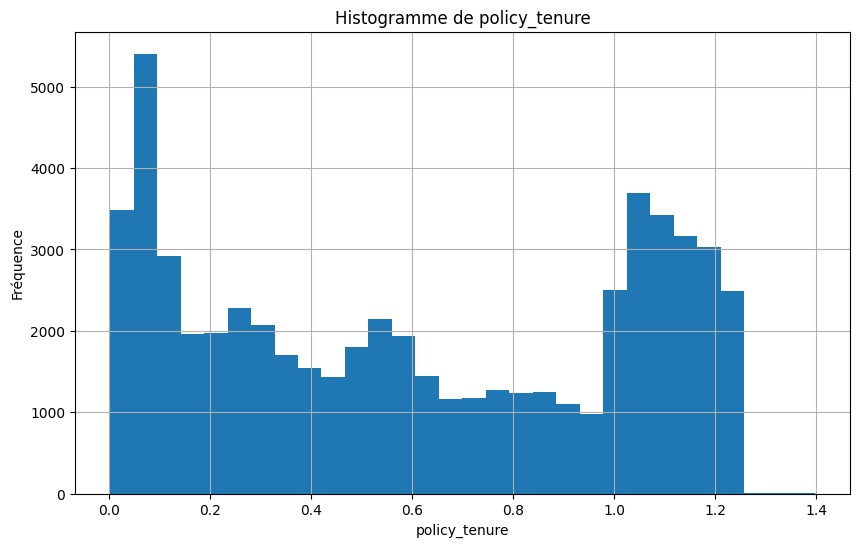

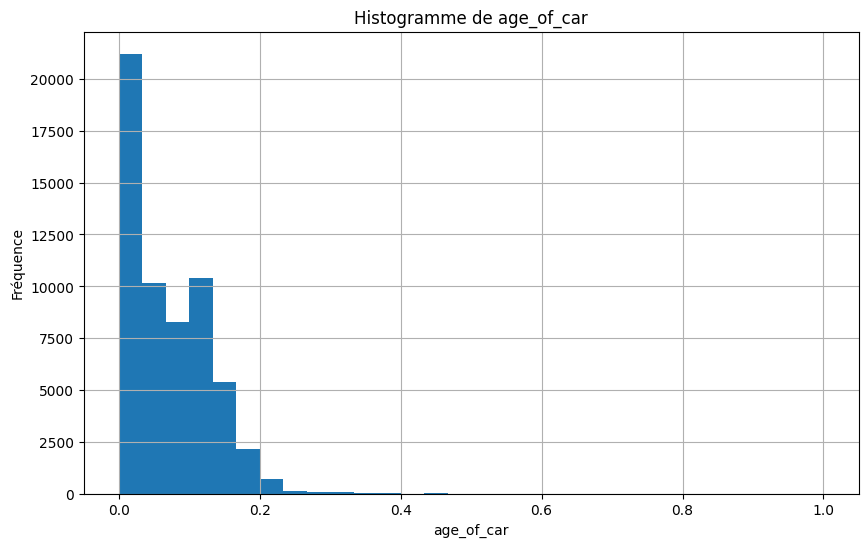

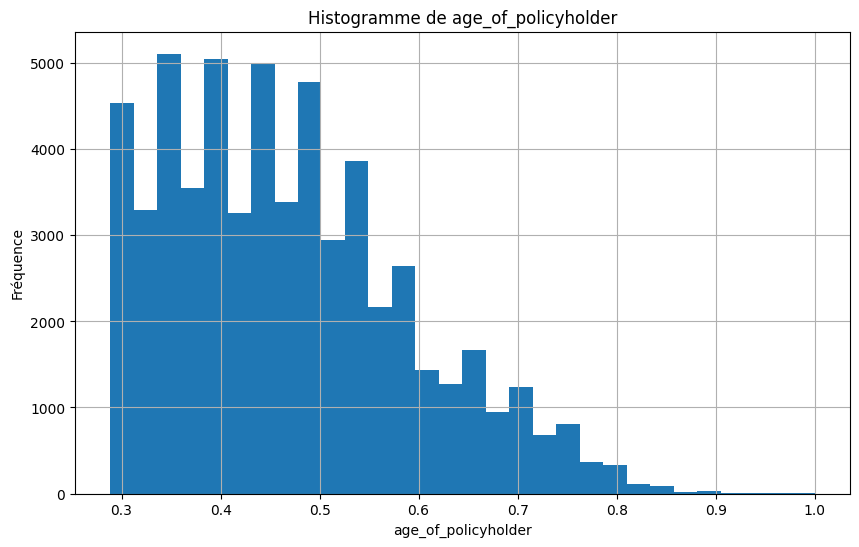

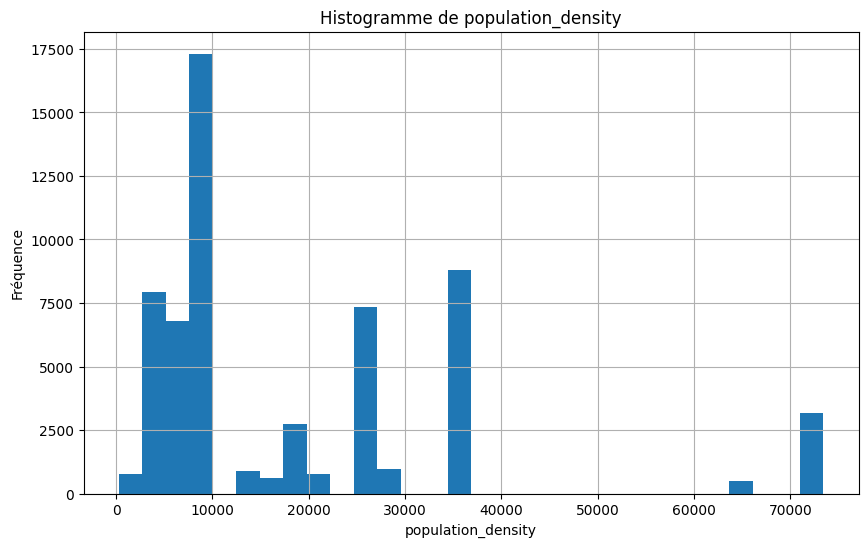

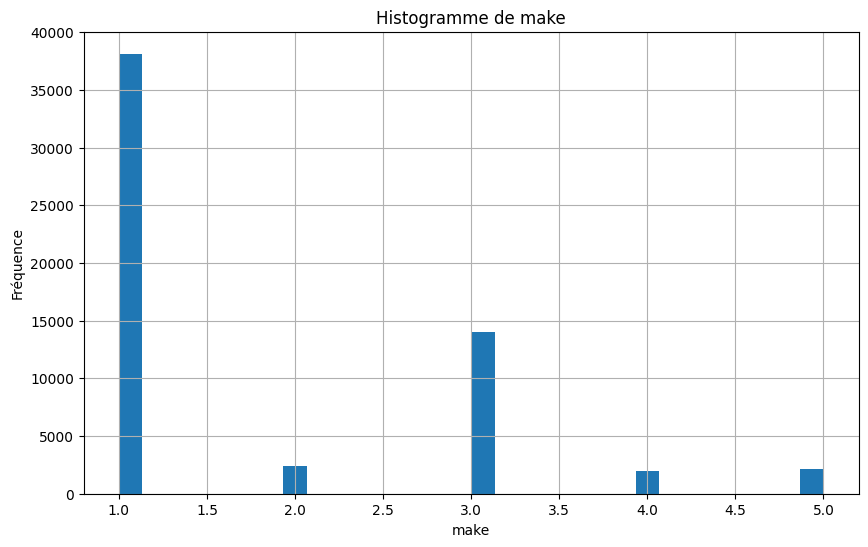

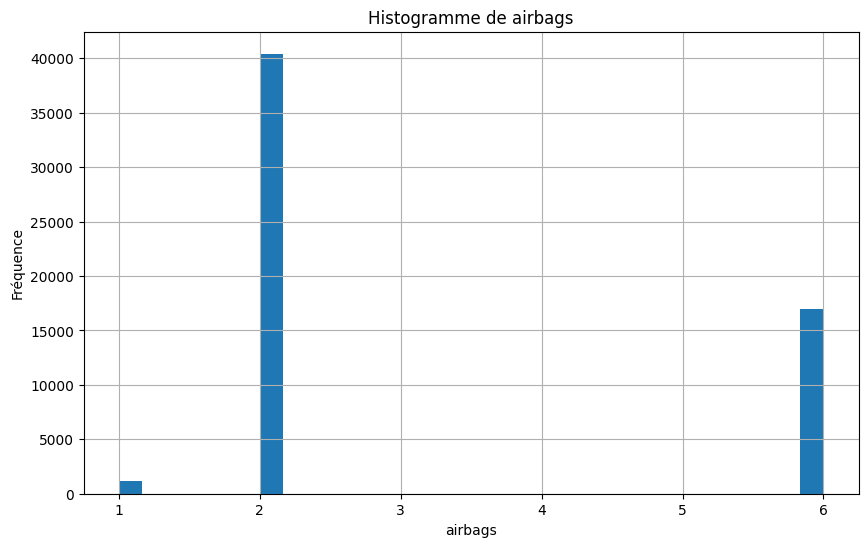

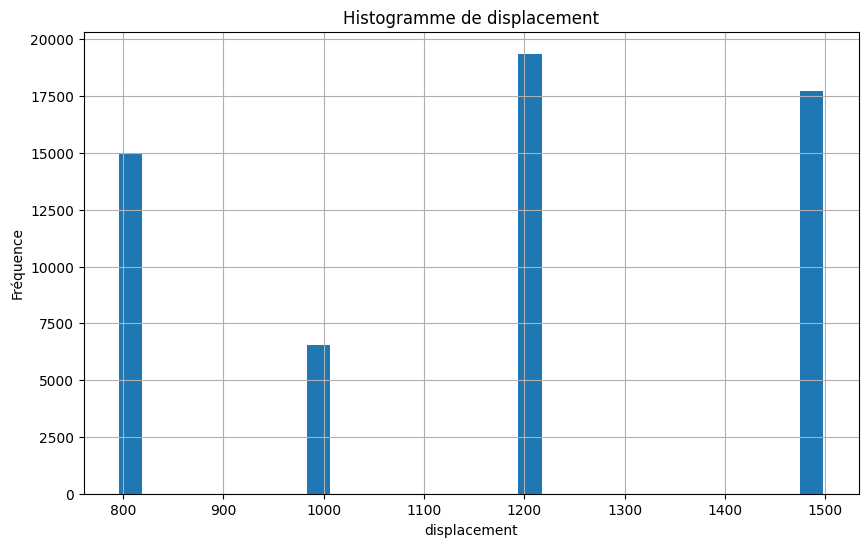

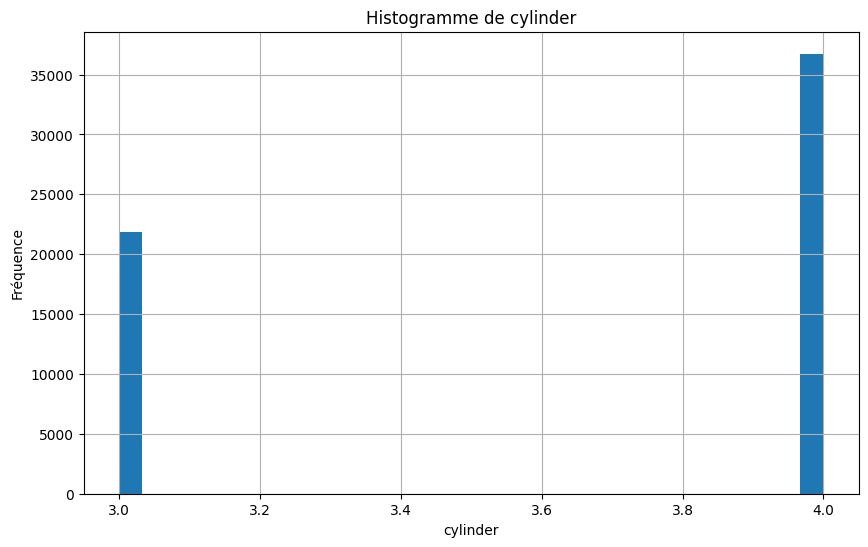

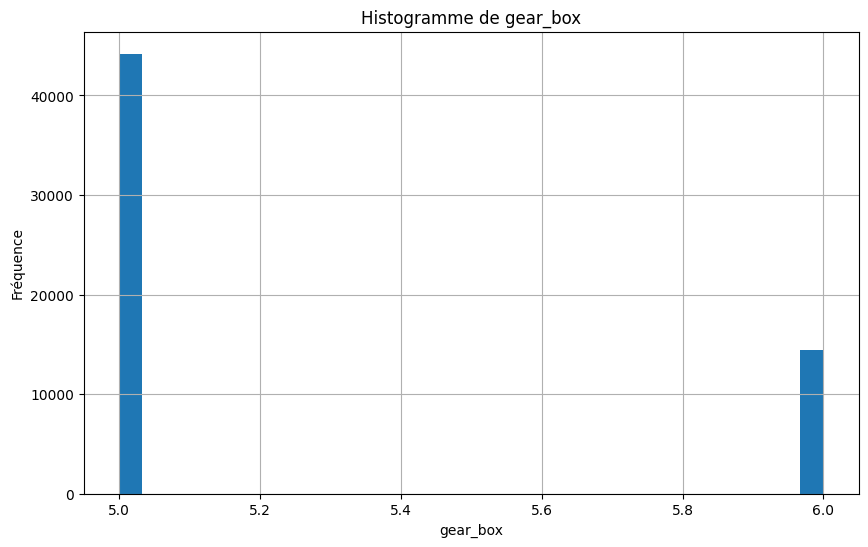

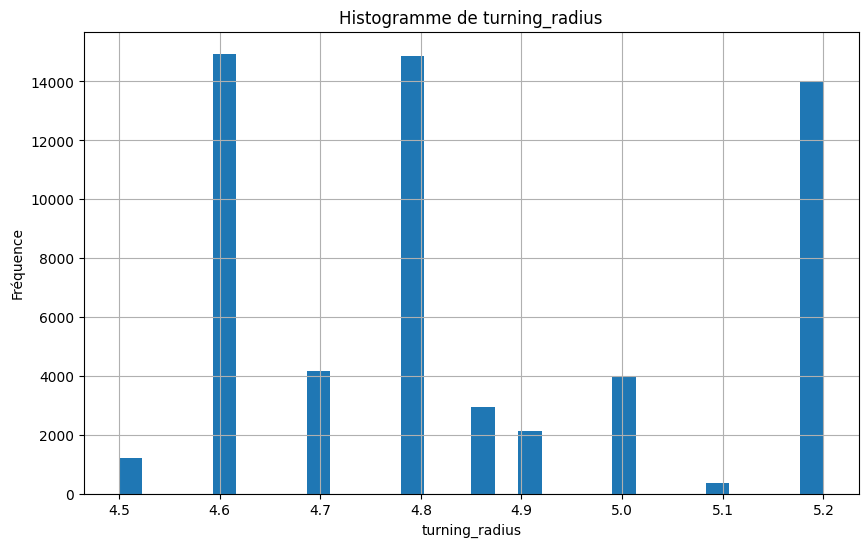

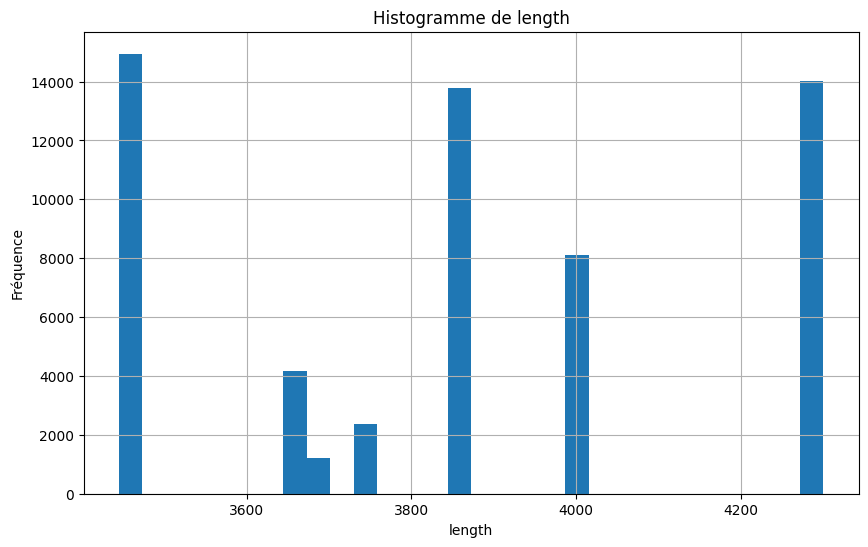

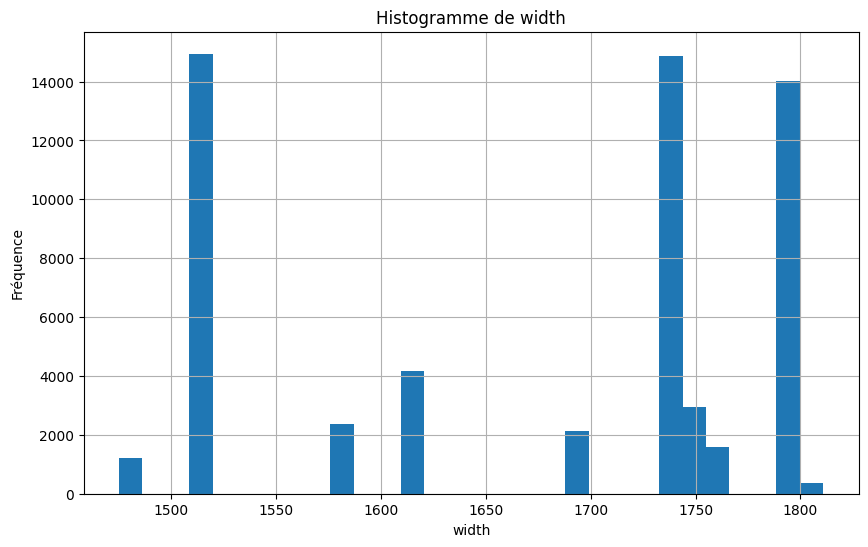

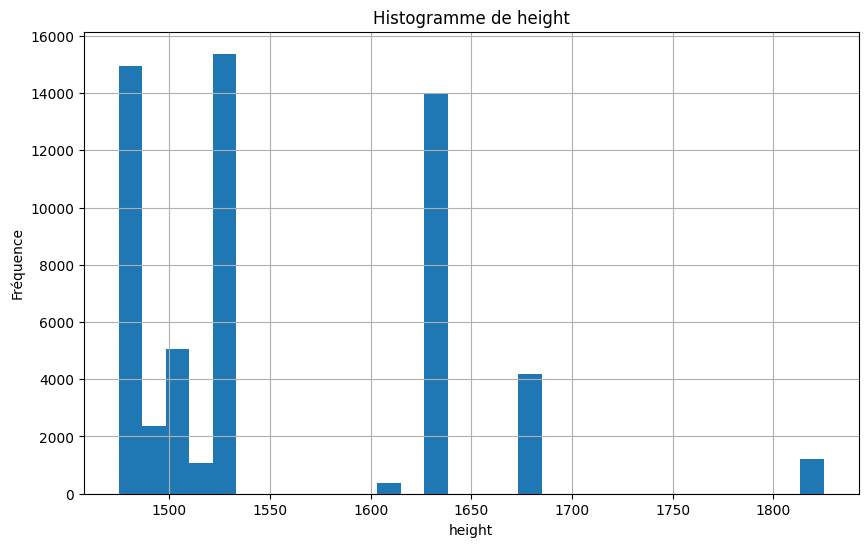

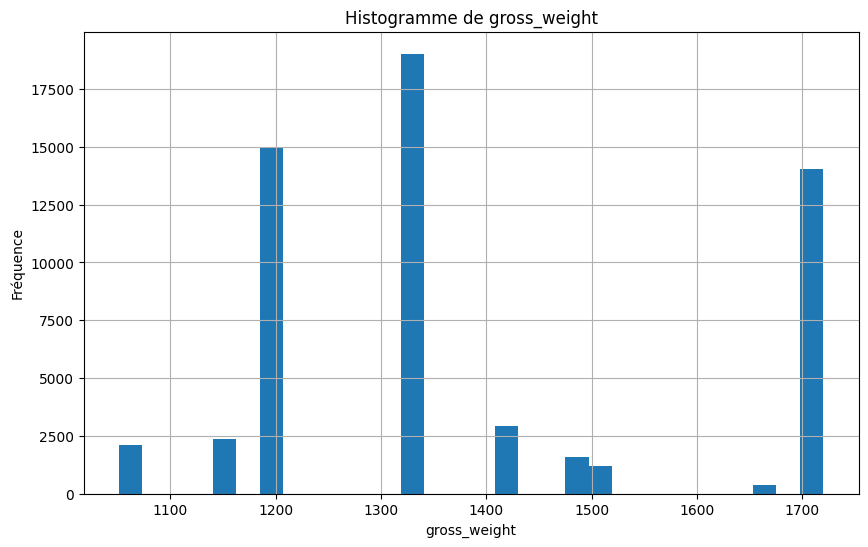

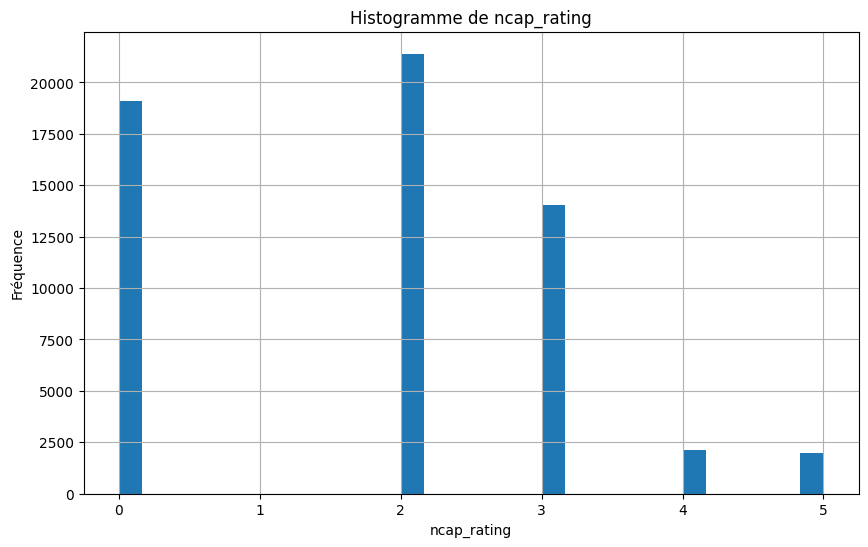

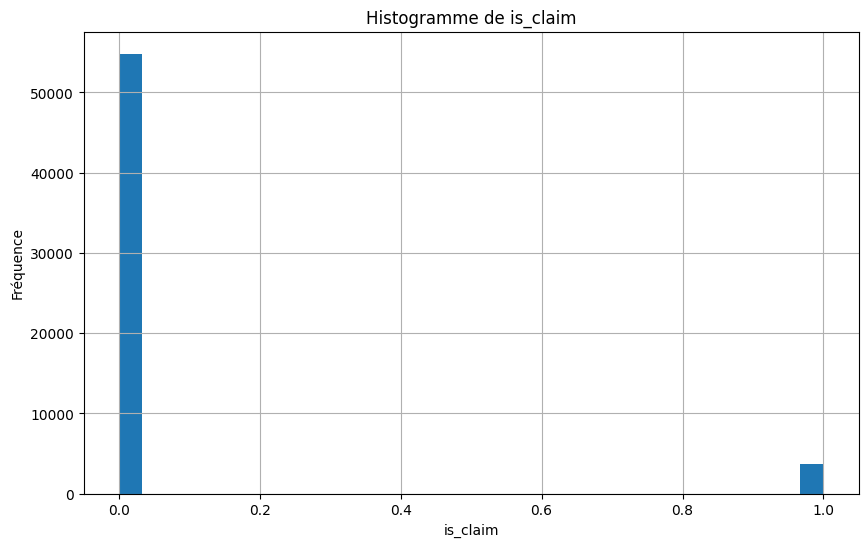

In [23]:
for column in numerical_df.columns:
    plt.figure(figsize=(10, 6))
    numerical_df[column].hist(bins=30)
    plt.title(f'Histogramme de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.show()

In [26]:
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.abs().sort_values(kind="quicksort", ascending=False)
high_corr_pairs = sorted_pairs[sorted_pairs < 1].nlargest(5)

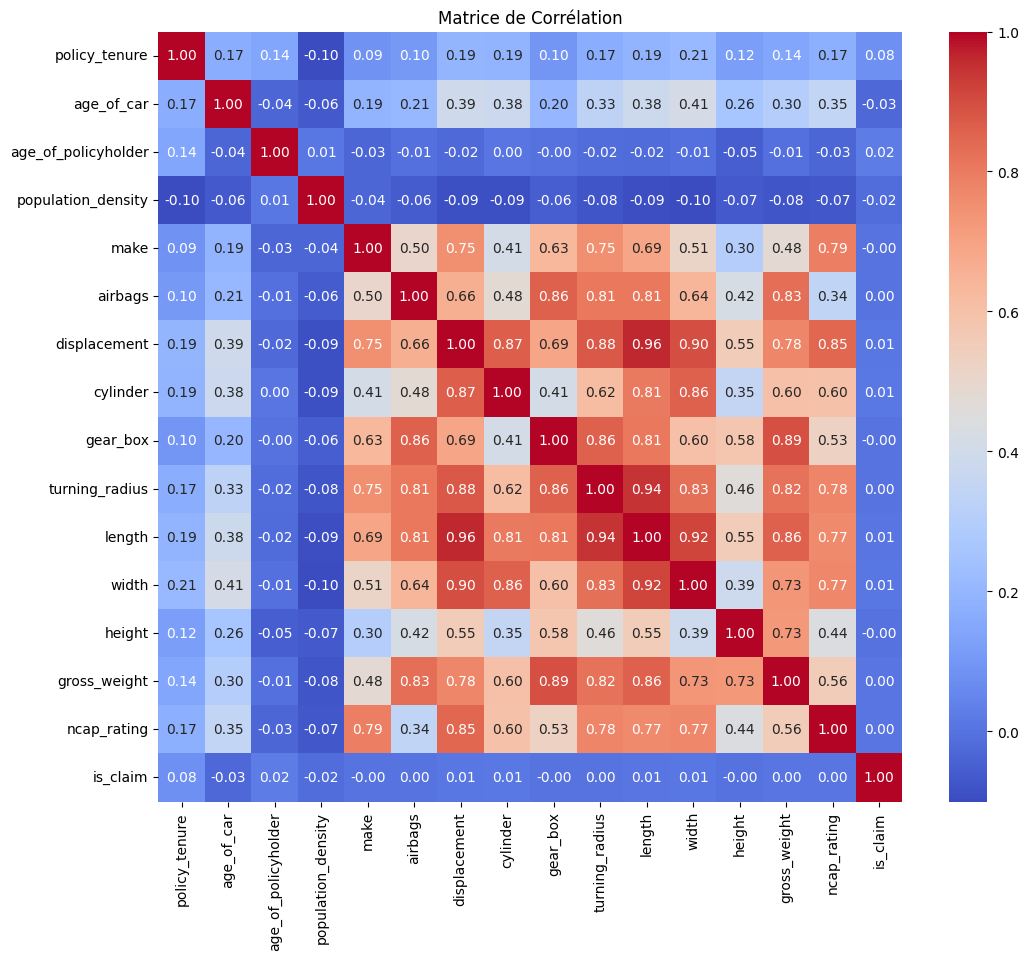

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

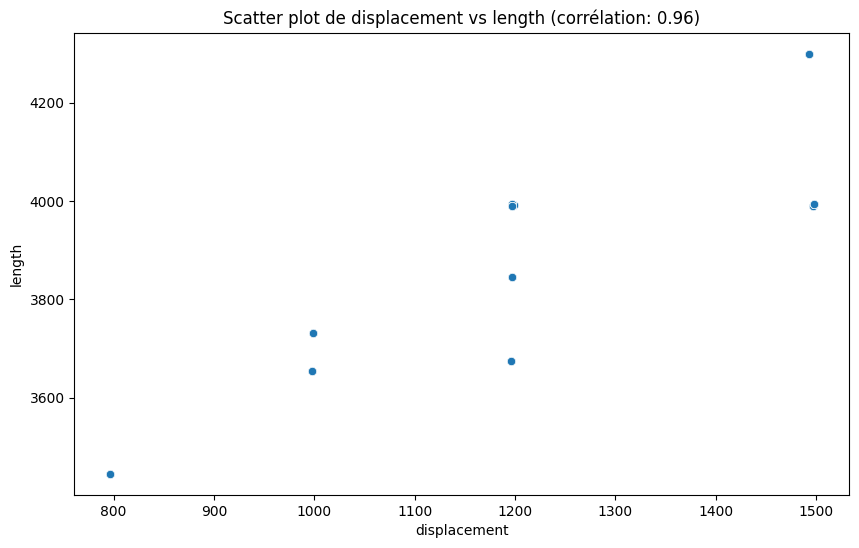

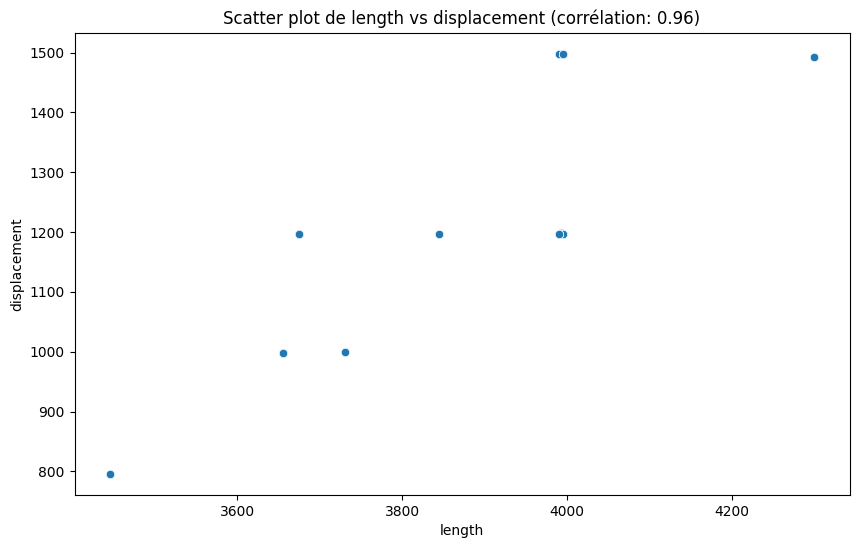

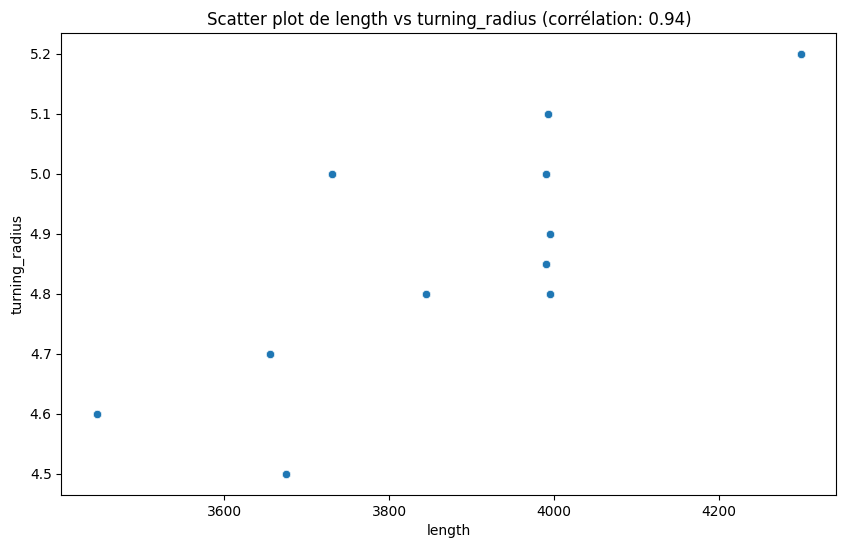

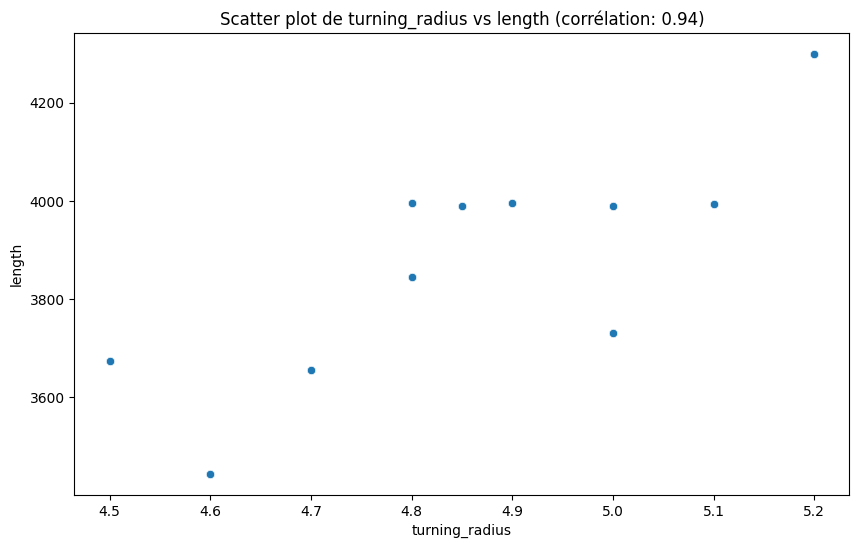

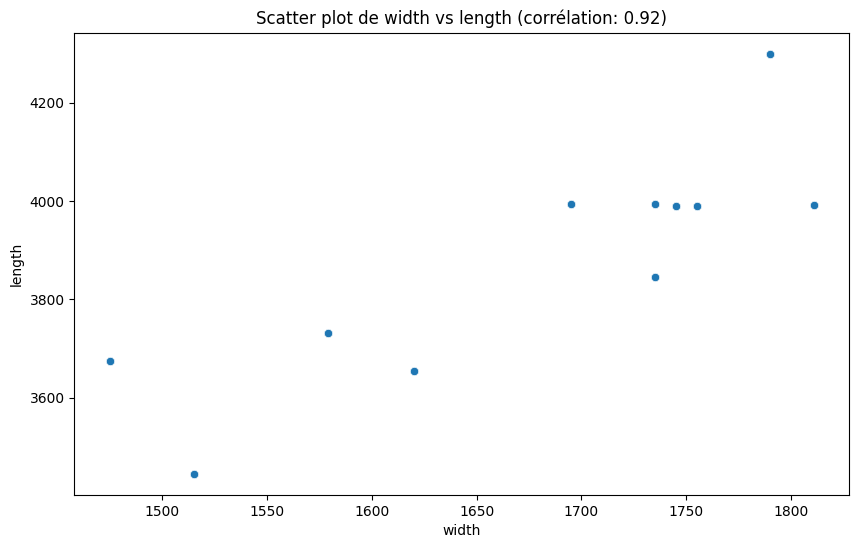

In [28]:
for (var1, var2) in high_corr_pairs.index:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=numerical_df[var1], y=numerical_df[var2])
    plt.title(f'Scatter plot de {var1} vs {var2} (corrélation: {correlation_matrix.loc[var1, var2]:.2f})')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

In [16]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column])
    plt.title(f'Distribution de {column}')
    plt.xticks(rotation=45)
    plt.show()

if 'is_claim' in df.columns:
    for column in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=df[column], hue=df['is_claim'])
        plt.title(f'Relation entre {column} et is_claim')
        plt.xticks(rotation=45)
        plt.show()